In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from tqdm import tqdm

## 12.5

(b)

m=2.8144117885765105


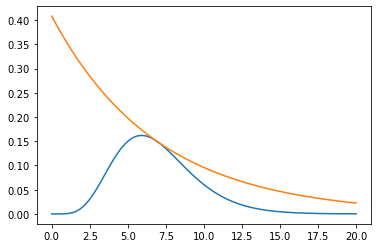

In [2]:
from scipy.special import gamma

k = 4000

alpha = 6.9

beta = 1 / alpha

m = alpha ** alpha / gamma(alpha) * np.exp(-(alpha-1))

print(f"m={m}")

grid = np.linspace(0, 20, 100)
plt.plot(grid, stats.gamma(alpha).pdf(grid))
plt.plot(grid, m * stats.expon(scale=1 / beta).pdf(grid))
plt.show()

In [3]:
samples = 0

xs = []

for _ in tqdm(range(k)):
    while True:
        v = stats.expon(scale=1 / beta).rvs()
        u = stats.uniform.rvs()
        
        samples += 1
        
        if u < stats.gamma(alpha).pdf(v) / (m * stats.expon(scale=1 / beta).pdf(v)):
            break
            
    xs.append(v)

xs = np.array(xs)

100%|██████████████████████████████████████| 4000/4000 [00:26<00:00, 152.82it/s]


In [4]:
mean_est = np.mean(xs)
mean_true = stats.gamma(alpha).mean()
print(f"mean_est={mean_est}, mean_true={mean_true}")

mean_est=6.932523273937939, mean_true=6.9


In [5]:
avg_samples = samples / k
print(f"avg_samples={avg_samples}, m={m}")

avg_samples=2.82125, m=2.8144117885765105


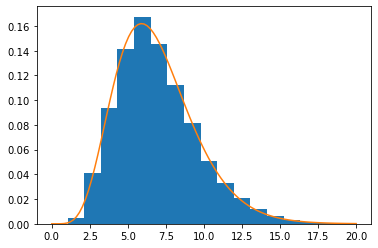

In [6]:
grid = np.linspace(0, 20, 100)
plt.hist(xs, 16, density=True)
plt.plot(grid, stats.gamma(alpha).pdf(grid))
plt.show()

(c)

m=1.0743203306537366


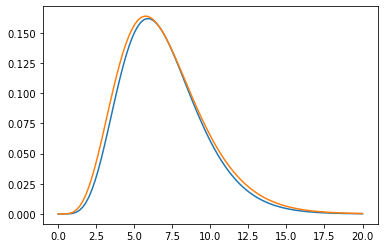

In [7]:
alpha_int = int(alpha)

beta = alpha_int / alpha

m = gamma(alpha_int) / gamma(alpha) * np.exp(-(alpha - alpha_int)) * alpha ** alpha / alpha_int ** alpha_int

print(f"m={m}")

grid = np.linspace(0, 20, 100)
plt.plot(grid, stats.gamma(alpha).pdf(grid))
plt.plot(grid, m * stats.gamma(alpha_int, scale=1 / beta).pdf(grid))
plt.show()

In [8]:
samples = 0

xs = []

for _ in tqdm(range(k)):
    while True:
        v = stats.gamma(alpha_int, scale=1 / beta).rvs()
        u = stats.uniform.rvs()
        
        samples += 1
        
        if u < stats.gamma(alpha).pdf(v) / (m * stats.gamma(alpha_int, scale=1 / beta).pdf(v)):
            break
            
    xs.append(v)

xs = np.array(xs)

100%|██████████████████████████████████████| 4000/4000 [00:09<00:00, 422.29it/s]


In [9]:
mean_est = np.mean(xs)
mean_true = stats.gamma(alpha).mean()
print(f"mean_est={mean_est}, mean_true={mean_true}")

mean_est=6.9225775511327505, mean_true=6.9


In [10]:
avg_samples = samples / k
print(f"avg_samples={avg_samples}, m={m}")

avg_samples=1.082, m=1.0743203306537366


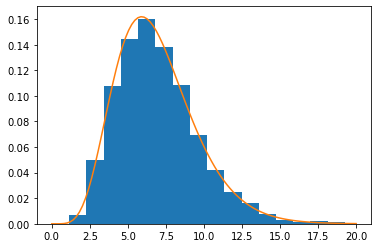

In [11]:
plt.hist(xs, 16, density=True)
plt.plot(grid, stats.gamma(alpha).pdf(grid))
plt.show()

## 12.6

In [12]:
xs = [1.8, 1.3, 2.6, 1.8, 4.6, 1.9, 1.0, 1.5]

In [13]:
n = len(xs)

m = gamma(n + 1) / np.sum(xs) ** (n + 1) * 2 / 3

def prior(x):
    p = np.zeros_like(x)
    
    p[(x >= 0) & (x < 1)] = 2 / 3
    p[(x >= 1) & (x < 2)] = 2 / 3 * (2 - x[(x >= 1) & (x < 2)])
    
    return p

posterior = lambda theta: theta ** n * np.exp(-np.sum(xs) * theta) * prior(theta)

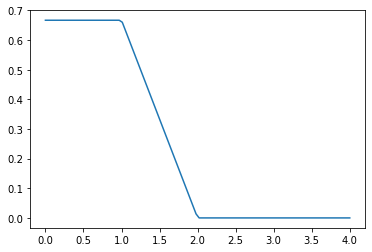

In [14]:
grid = np.linspace(0, 4, 100)
plt.plot(grid, prior(grid))
plt.show()

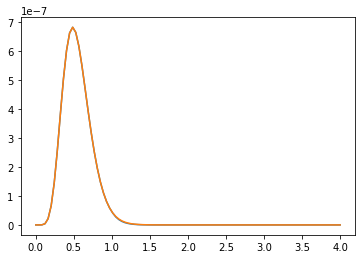

In [15]:
plt.plot(grid, posterior(grid))
plt.plot(grid, m * stats.gamma(n + 1, scale=1 / np.sum(xs)).pdf(grid))
plt.show()

In [16]:
thetas = []

k = 2000

for _ in tqdm(range(k)):
    while True:
        v = stats.gamma(n + 1, scale=1 / np.sum(xs)).rvs()
        u = stats.uniform.rvs()
        
        samples += 1
        
        if u < prior(v) / (2 / 3):
            break
            
    thetas.append(v)

thetas = np.array(thetas)

100%|█████████████████████████████████████| 2000/2000 [00:01<00:00, 1234.79it/s]


In [17]:
thetas0 = thetas

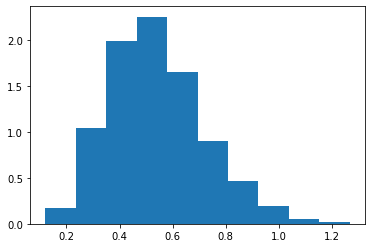

In [18]:
plt.hist(thetas, density=True)
plt.show()

In [19]:
ys = []

for theta in thetas:
    y = stats.expon.rvs(scale=1 / theta)
    ys.append(y)
    
ys = np.array(ys)

In [20]:
ys_sorted = sorted(ys)

a = ys_sorted[int(0.025 * k)]
b = ys_sorted[-int(0.025 * k)]

print(f"interval [{a}, {b}]")

interval [0.05767164503654549, 8.561054399685963]


In [21]:
np.mean(ys > 1)

0.5845

## 12.7

In [22]:
a = 3

In [23]:
k = 1000

xs = []

samples = 0

for _ in tqdm(range(k)):
    while True:
        z = stats.norm.rvs()
        
        samples += 1
        
        if z > a:
            break
            
    xs.append(z)
            
xs = np.array(xs)

100%|███████████████████████████████████████| 1000/1000 [00:23<00:00, 42.40it/s]


In [24]:
avg_samples = samples / k

print(f"avg_samples={avg_samples}")

est_avg_samples = 1 / (1 - stats.norm.cdf(a))

print(f"est_avg_samples={est_avg_samples}")

avg_samples=686.87
est_avg_samples=740.7966946899128


In [25]:
xs = []

samples = 0

lamb = a / 2 + np.sqrt(a ** 2 / 4 + 1)

m = 1 / (lamb * np.sqrt(2 * np.pi)) * np.exp(lamb ** 2 / 2 - a * lamb)

for _ in tqdm(range(k)):
    while True:
        z = stats.expon.rvs(loc=a, scale=1 / lamb)
        
        u = stats.uniform.rvs()
        
        samples += 1
        
        if u < stats.norm.pdf(z) / (m * stats.expon.pdf(z, loc=a, scale=1 / lamb)):
            break
    
    xs.append(z)
    
xs = np.array(xs)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 2695.12it/s]


In [26]:
avg_samples = samples / k

print(f"avg_samples={avg_samples}")

avg_samples=1.04


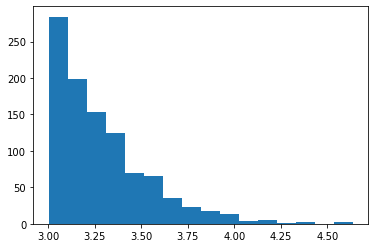

In [27]:
plt.hist(xs, 16)
plt.show()

In [28]:
np.mean(xs)

3.28175303761303

## 12.8

In [29]:
xs = [13, 5, 8, 5, 8]
n = len(xs)

likelihood = lambda theta: theta ** np.sum(xs) * np.exp(-n * theta)
prior = lambda theta: np.exp(-(theta - 10) ** 2 / 2)

posterior = lambda theta: likelihood(theta) * prior(theta)

In [30]:
from scipy.special import loggamma

m = np.exp(loggamma(np.sum(xs) + 1) - (np.sum(xs) + 1) * np.log(n))
print(f"{m}")

2.242770853028006e+18


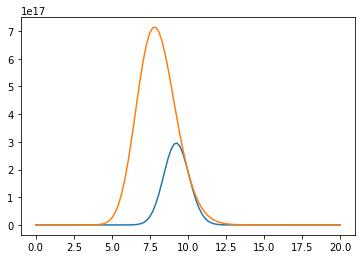

In [31]:
grid = np.linspace(0, 20, 100)
plt.plot(grid, posterior(grid))
plt.plot(grid, m * stats.gamma(a=np.sum(xs) + 1, scale=1 / n).pdf(grid))
plt.show()

In [32]:
k = 10000

thetas = []

for _ in tqdm(range(k)):
    while True:
        v = stats.gamma.rvs(a=np.sum(xs) + 1, scale=1 / n, size=1)
        u = stats.uniform.rvs()
        
        if u < np.exp(-(v - 10) ** 2 / 2):
            break
    
    thetas.append(v)
    
thetas = np.array(thetas)

100%|███████████████████████████████████| 10000/10000 [00:04<00:00, 2297.05it/s]


In [33]:
np.mean(thetas)

9.251134784760634

In [34]:
prob_H0 = np.mean(thetas <= 9)
prob_H1 = np.mean(thetas > 9)

print(f"prob_H0={prob_H0}, prob_H1={prob_H1}")

odds = prob_H0 / prob_H1

print(f"odds={odds}")

prob_H0=0.3835, prob_H1=0.6165
odds=0.6220600162206001


## 12.10

In [35]:
xs = [5.80, 7.88, 2.97, 4.33, 3.25, 6.83, 1.73]
n = len(xs)

xbar = np.mean(xs)
s2 = np.var(xs, ddof=1)

old_prior = lambda mean, var: 1 / var
new_prior = lambda mean, var: np.exp(-(mean-10) ** 2 / (2 * 2 ** 2)) * ((var > 1) & (var < 3 ** 2)).astype(np.float64)

prior = new_prior
likelihood = lambda mean, var: var ** (-n/2) * np.exp(-((n-1) * s2 + n * (xbar - mean) ** 2) / (2 * var))

posterior = lambda mean, var: prior(mean, var) * likelihood(mean, var)

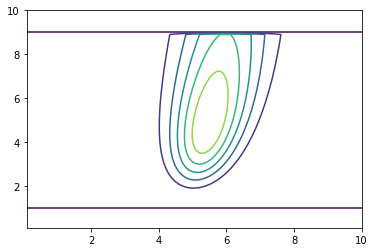

In [36]:
mean_grid, var_grid = np.mgrid[0.1:10:100j, 0.1:10:100j]

plt.contour(mean_grid, var_grid, posterior(mean_grid, var_grid))
plt.show()

In [37]:
c = 2

k = 8000

thetas = [np.array([stats.cauchy.rvs(loc=xbar, scale=0.1), np.abs(stats.cauchy.rvs(loc=s2, scale=0.1))])]

for _ in tqdm(range(k - 1)):
    last = thetas[-1]
    
    proposal = np.zeros_like(last)
    proposal[0] = last[0] + stats.norm.rvs(scale=c, size=1)
    proposal[1] = last[1] * stats.expon.rvs(scale=c, size=1)
    
    r = posterior(*proposal) / posterior(*last)
    
    u = stats.uniform.rvs()
    
    if u < min(1, r):
        thetas.append(proposal)
    else:
        thetas.append(last)
        
thetas = np.array(thetas)

100%|█████████████████████████████████████| 7999/7999 [00:01<00:00, 5403.55it/s]


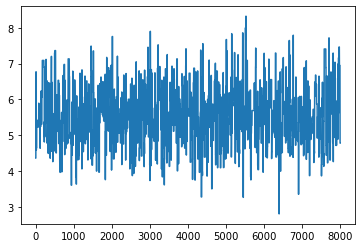

In [38]:
plt.plot(thetas[:, 0])
plt.show()

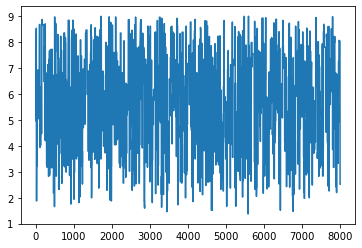

In [39]:
plt.plot(thetas[:, 1])
plt.show()

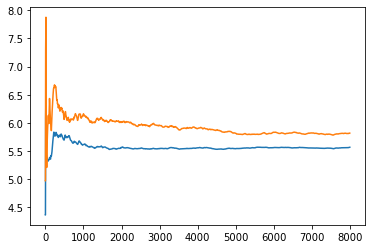

In [40]:
plt.plot(np.cumsum(thetas, axis=0) / (np.arange(k) + 1)[:, np.newaxis])
plt.show()

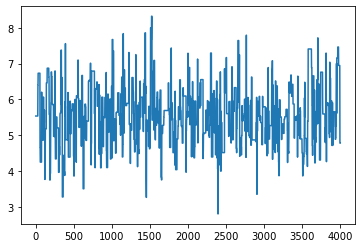

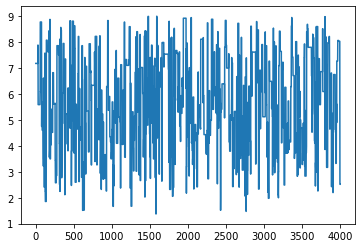

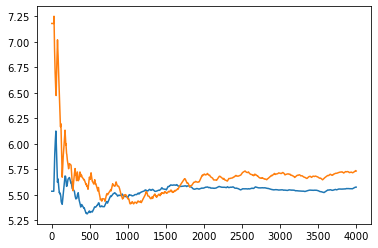

In [41]:
thetas_split = thetas[-k // 2:]

plt.plot(thetas_split[:, 0])
plt.show()

plt.plot(thetas_split[:, 1])
plt.show()

plt.plot(np.cumsum(thetas_split, axis=0) / (np.arange(len(thetas_split)) + 1)[:, np.newaxis])
plt.show()

In [42]:
v3_est = np.mean(thetas_split[:, 0] ** 3)

print(f"v3_est={v3_est}")

v3_est=185.36477872384003


In [43]:
loss1 = 11400 - 170.5 * v3_est
loss2 = 67900 - 600 * v3_est

print(f"loss1={loss1}, loss2={loss2}")

loss1=-20204.694772414725, loss2=-43318.86723430402


## 12.12

In [44]:
import csv

In [45]:
temps = []
sales = []

with open("öv_12_glass.csv") as f:
    reader = csv.reader(f)
    next(reader)
    for line in reader:
        temps.append(float(line[1]))
        sales.append(int(line[2]))

In [46]:
def log_prior(a, b):
    return stats.cauchy.logpdf(a) + stats.norm.logpdf(b, loc=20, scale=10)

def log_posterior(a, b):
    log_p = log_prior(a, b)
    for temp, sale in zip(temps, sales):
        log_p += stats.poisson.logpmf(sale, a * np.maximum(temp - 18, 0) + b)
    return log_p

In [47]:
log_posterior(4, 24)

-296.4674977375159

In [48]:
c = 0.3

k = 2000

params = [np.array([4, 20])]

for _ in tqdm(range(k - 1)):
    last = params[-1]
    
    proposal = np.zeros_like(last)
    proposal = last + stats.norm.rvs(scale=c, size=2)
    
    r = np.exp(log_posterior(*proposal) - log_posterior(*last))
    
    u = stats.uniform.rvs()
    
    if u < min(1, r):
        params.append(proposal)
    else:
        params.append(last)
        
params = np.array(params)

100%|███████████████████████████████████████| 1999/1999 [00:29<00:00, 67.36it/s]


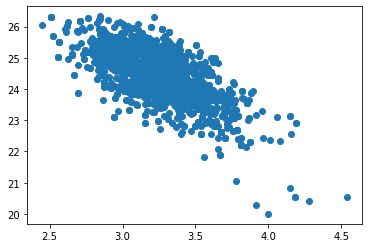

In [49]:
plt.scatter(params[:, 0], params[:, 1])
plt.show()

In [50]:
np.mean(params[:, 0] > 0)

1.0

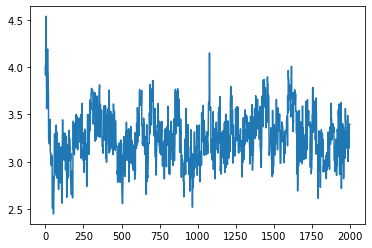

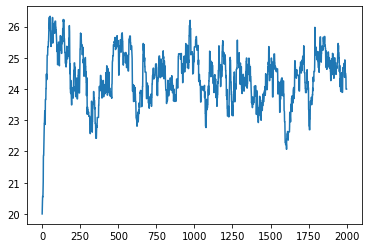

In [51]:
plt.plot(params[:, 0])
plt.show()

plt.plot(params[:, 1])
plt.show()

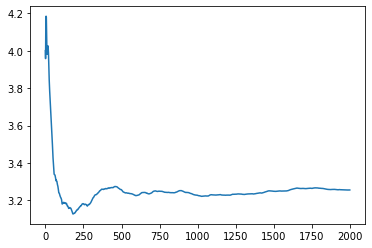

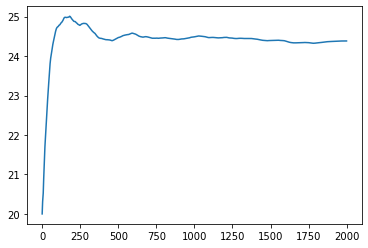

In [52]:
plt.plot(np.cumsum(params[:, 0]) / np.arange(1, len(params) + 1))
plt.show()

plt.plot(np.cumsum(params[:, 1]) / np.arange(1, len(params) + 1))
plt.show()

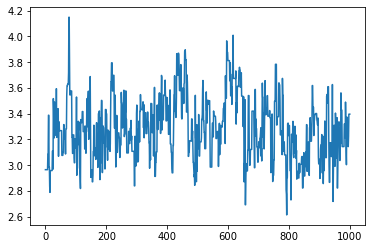

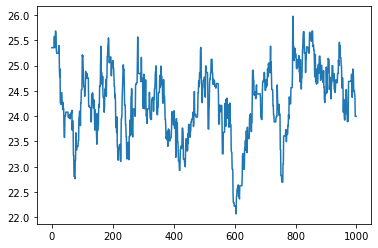

In [53]:
params = params[k // 2:]

plt.plot(params[:, 0])
plt.show()

plt.plot(params[:, 1])
plt.show()

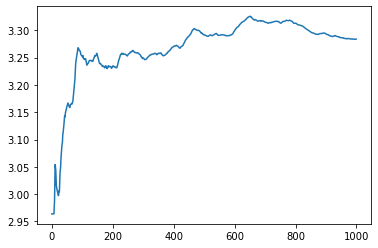

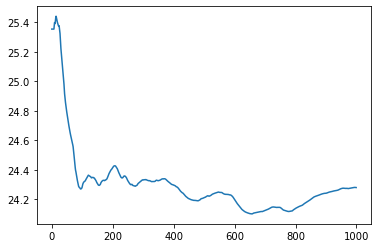

In [54]:
plt.plot(np.cumsum(params[:, 0]) / np.arange(1, len(params) + 1))
plt.show()

plt.plot(np.cumsum(params[:, 1]) / np.arange(1, len(params) + 1))
plt.show()

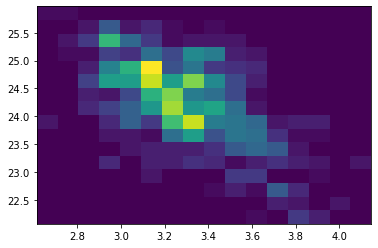

In [55]:
plt.hist2d(params[:, 0], params[:, 1], 16)
plt.show()

In [56]:
a_mean, b_mean = np.mean(params, axis=0)
print(f"a_mean={a_mean}, b_mean={b_mean}")

a_mean=3.283937948751239, b_mean=24.27977321579383


In [57]:
def loss(a_hat, b_hat):
    losses = [np.sqrt((a - a_hat) ** 2 + (b - b_hat) ** 2) for a, b in params]
    return np.mean(losses)

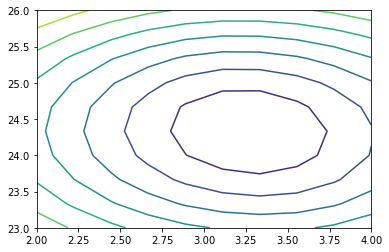

In [58]:
a_grid = np.linspace(2, 4, 10)
b_grid = np.linspace(23, 26, 10)

loss_grid = [[loss(a_hat, b_hat) for a_hat in a_grid] for b_hat in b_grid]
loss_grid = np.array(loss_grid)

plt.contour(a_grid, b_grid, loss_grid)
plt.show()

In [59]:
ind = np.argmin(loss_grid, axis=None)
a_ind, b_ind = np.unravel_index(ind, loss_grid.shape)
a_coarse = a_grid[a_ind]
b_coarse = b_grid[b_ind]

print(f"a_coarse={a_coarse}, b_coarse={b_coarse}")

a_coarse=2.888888888888889, b_coarse=25.0


In [60]:
def loss_grad(a_hat, b_hat):
    diffs = [np.array([a_hat - a, b_hat - b]) for a, b in params]
    diffs = [diff / np.linalg.norm(diff) for diff in diffs]
    return np.mean(diffs, axis=0)

In [61]:
est = np.array([3, 24])
losses = []

for _ in tqdm(range(40)):
    est = est - 1e-1 * loss_grad(est[0], est[1])
    losses.append(loss(est[0], est[1]))

losses = np.array(losses)

100%|██████████████████████████████████████████| 40/40 [00:00<00:00, 100.04it/s]


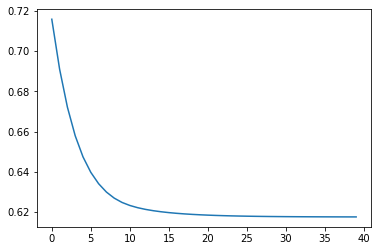

In [62]:
plt.plot(losses)
plt.show()

In [63]:
a_fine, b_fine = est
print(f"a_fine={a_fine}, b_fine={b_fine}")

a_fine=3.259807860544397, b_fine=24.343346327737052


In [64]:
loss(a_coarse, b_coarse)

0.9324903801623539

In [65]:
loss(a_fine, b_fine)

0.6176884232174571